In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('adult.csv')

In [3]:
# Display top 10 rows in the dataset
data.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [5]:
#number of rows and columns 
print("Number  of rows",data.shape[0])
print("Number of columns",data.shape[1])

Number  of rows 48842
Number of columns 15


In [6]:
#metadata
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [9]:
#Fetch random samples from the dataset
data.sample(frac=0.50,random_state=100)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
12393,37,Private,110331,Prof-school,15,Married-civ-spouse,Other-service,Wife,White,Female,0,0,60,United-States,>50K
48701,23,Private,45834,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,50,United-States,<=50K
17918,28,Private,89718,HS-grad,9,Never-married,Sales,Not-in-family,White,Female,2202,0,48,United-States,<=50K
11352,30,Private,351770,9th,5,Divorced,Other-service,Unmarried,White,Female,0,0,38,United-States,<=50K
36198,31,Private,164190,10th,6,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48573,41,Private,318046,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,48,United-States,>50K
47252,41,Local-gov,33658,Some-college,10,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,45,United-States,>50K
33142,69,Private,312653,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,25,United-States,<=50K
2965,21,?,334593,Some-college,10,Never-married,?,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [13]:
#Checking null values 
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [14]:
#Replace ? with NaN
data.isin(['?']).sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [18]:
import numpy as np
data['workclass'] = data['workclass'].replace('?',np.nan)
data['occupation'] = data['occupation'].replace('?',np.nan)
data['native-country'] = data['native-country'].replace('?',np.nan)


In [20]:
#Drop all the missing values
#Finding null values percentage in the dataset
per_missing = data.isnull().sum()*100/len(data)
per_missing

age                0.000000
workclass          5.730724
fnlwgt             0.000000
education          0.000000
educational-num    0.000000
marital-status     0.000000
occupation         5.751198
relationship       0.000000
race               0.000000
gender             0.000000
capital-gain       0.000000
capital-loss       0.000000
hours-per-week     0.000000
native-country     1.754637
income             0.000000
dtype: float64

In [22]:
data.dropna(how='any',inplace=True)
data.shape

(45222, 15)

In [31]:
#Check for duplicate data and drop them
dup=data.duplicated().any()


In [33]:
data.drop_duplicates(inplace=True)
dup=data.duplicated().any()
print("duplicate values exist?",dup)

duplicate values exist? False


In [34]:
#Get overall statistics about the dataframe
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,45175.000000,4.517500e+04,45175.000000,45175.000000,45175.000000,45175.000000
mean,38.556170,1.897388e+05,10.119314,1102.576270,88.687593,40.942512
std,13.215349,1.056524e+05,2.551740,7510.249876,405.156611,12.007730
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.173925e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783120e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.379030e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [35]:
#Drop the columns education-num, capital-gain and capital-loss
data=data.drop(['educational-num','capital-gain','capital-loss'],axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45175 entries, 0 to 48841
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45175 non-null  int64 
 1   workclass       45175 non-null  object
 2   fnlwgt          45175 non-null  int64 
 3   education       45175 non-null  object
 4   marital-status  45175 non-null  object
 5   occupation      45175 non-null  object
 6   relationship    45175 non-null  object
 7   race            45175 non-null  object
 8   gender          45175 non-null  object
 9   hours-per-week  45175 non-null  int64 
 10  native-country  45175 non-null  object
 11  income          45175 non-null  object
dtypes: int64(3), object(9)
memory usage: 4.5+ MB


In [36]:
#Univariate Analysis

#What is the distribution of age column ?


In [37]:
data['age'].describe()

count    45175.000000
mean        38.556170
std         13.215349
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         90.000000
Name: age, dtype: float64

<Axes: >

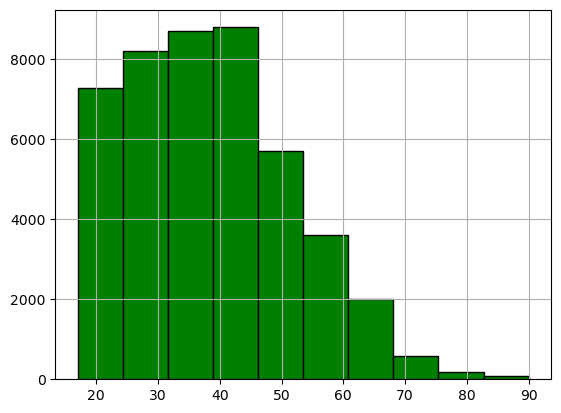

In [43]:
data['age'].hist(color="green",lw=1,ec="black")

In [44]:
#Find total number of persons having age between between 17 to 48 (inclusive) using between method
sum(data['age'].between(17,48))

34858

In [48]:
#What is the distribution of workclass column ?
data['workclass'].describe()

count       45175
unique          7
top       Private
freq        33262
Name: workclass, dtype: object

<Axes: >

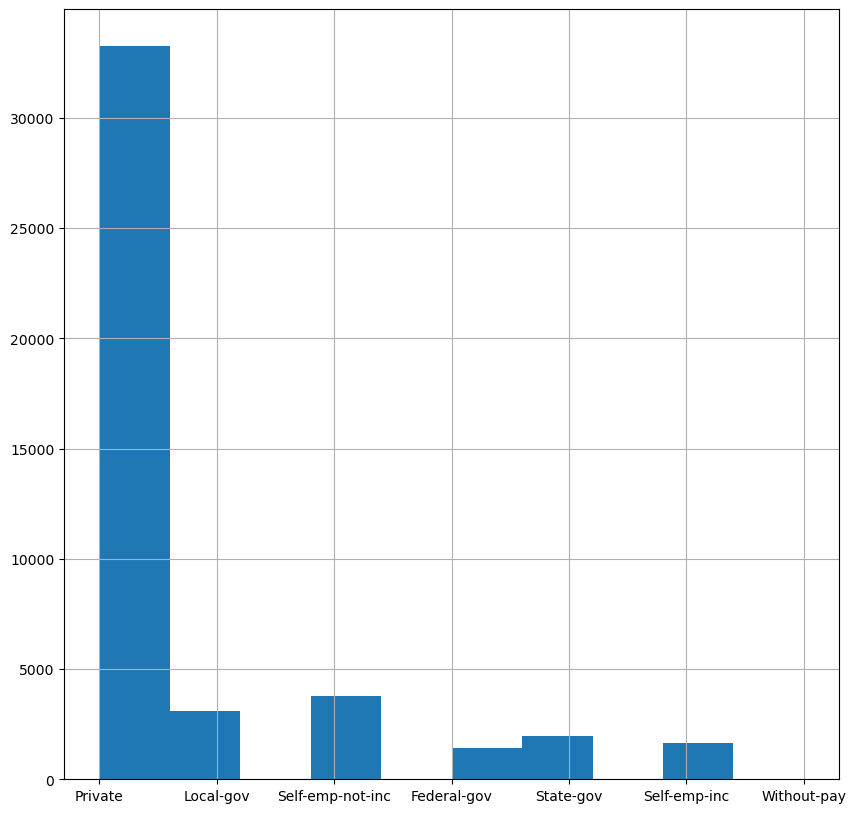

In [49]:
plt.figure(figsize=(10,10))
data['workclass'].hist()

In [50]:
#How many persons having Bachelors or masters degree
filter1=data['education']=='Bachelors'
filter2=data['education']=='Masters'

In [51]:
sum(data['education'].isin(['Bachelors','Masters']))

10072

In [54]:
Masters_and_Bachelors=data[(data['education'].isin(['Bachelors','Masters']))]
Masters_and_Bachelors.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
11,36,Federal-gov,212465,Bachelors,Married-civ-spouse,Adm-clerical,Husband,White,Male,40,United-States,<=50K
15,43,Private,346189,Masters,Married-civ-spouse,Exec-managerial,Husband,White,Male,50,United-States,>50K
20,34,Private,107914,Bachelors,Married-civ-spouse,Tech-support,Husband,White,Male,47,United-States,>50K
23,25,Private,220931,Bachelors,Never-married,Prof-specialty,Not-in-family,White,Male,43,Peru,<=50K
24,25,Private,205947,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,40,United-States,<=50K


<Axes: xlabel='income', ylabel='age'>

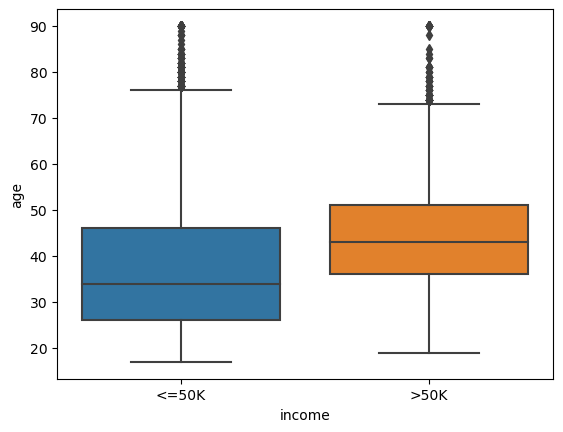

In [58]:
#Bivariate Analysis
sns.boxplot(x='income',y='age',data=data)

In [59]:
#Replace salary values['<=50K','>50K']with 0 and 1
data['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [60]:
def salary_data(sal):
    if sal == '<=50K':
        return 0
    else:
        return 1

In [62]:
data['encoded_salary']=data['income'].apply(salary_data)


In [63]:
#Replacing income values with built in function
data.replace(to_replace=['<=50K','>50K'],value=[0,1],inplace=True)

In [64]:
data.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income,encoded_salary
0,25,Private,226802,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,0,0
1,38,Private,89814,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,0,0
2,28,Local-gov,336951,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,1,1
3,44,Private,160323,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,1,1
5,34,Private,198693,10th,Never-married,Other-service,Not-in-family,White,Male,30,United-States,0,0


In [65]:
#Which workclass is getting the highest salary?
data.groupby('workclass')['income'].mean().sort_values(ascending=False)

workclass
Self-emp-inc        0.554407
Federal-gov         0.390469
Local-gov           0.295161
Self-emp-not-inc    0.279051
State-gov           0.267215
Private             0.217816
Without-pay         0.095238
Name: income, dtype: float64

In [69]:
#Who has better chance to get salary <50K Male or Female ?
data.groupby('gender')['income'].mean()


gender
Female    0.113692
Male      0.312609
Name: income, dtype: float64

In [71]:
#Convert workclass Columns datatype to category datatype
data['workclass']=data['workclass'].astype('category')

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45175 entries, 0 to 48841
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             45175 non-null  int64   
 1   workclass       45175 non-null  category
 2   fnlwgt          45175 non-null  int64   
 3   education       45175 non-null  object  
 4   marital-status  45175 non-null  object  
 5   occupation      45175 non-null  object  
 6   relationship    45175 non-null  object  
 7   race            45175 non-null  object  
 8   gender          45175 non-null  object  
 9   hours-per-week  45175 non-null  int64   
 10  native-country  45175 non-null  object  
 11  income          45175 non-null  int64   
 12  encoded_salary  45175 non-null  int64   
dtypes: category(1), int64(5), object(7)
memory usage: 4.5+ MB
